<a href="https://colab.research.google.com/github/KashProgramming/djs-compute-daml-tasks/blob/main/DAML_Task3_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task3/weather_australia.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# Date is not the primary key and there's no ID column to identify each row uniquely, so we will add the index of dataframe during output
df["Date"].isnull().sum()
df["Date"].is_unique

False

In [ ]:
print(df.iloc[0])

Date             2008-12-01
Location             Albury
MinTemp                13.4
MaxTemp                22.9
Rainfall                0.6
Evaporation             NaN
Sunshine                NaN
WindGustDir               W
WindGustSpeed          44.0
WindDir9am                W
WindDir3pm              WNW
WindSpeed9am           20.0
WindSpeed3pm           24.0
Humidity9am            71.0
Humidity3pm            22.0
Pressure9am          1007.7
Pressure3pm          1007.1
Cloud9am                8.0
Cloud3pm                NaN
Temp9am                16.9
Temp3pm                21.8
RainToday                No
RISK_MM                 0.0
RainTomorrow             No
Name: 0, dtype: object


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Finding out percentage of null values in each column
def get_null_percentages(df,columns):
    result={}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column,percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

Date: 0.0%
Location: 0.0%
MinTemp: 0.45%
MaxTemp: 0.23%
Rainfall: 0.99%
Evaporation: 42.79%
Sunshine: 47.69%
WindGustDir: 6.56%
WindGustSpeed: 6.52%
WindDir9am: 7.04%
WindDir3pm: 2.66%
WindSpeed9am: 0.95%
WindSpeed3pm: 1.85%
Humidity9am: 1.25%
Humidity3pm: 2.54%
Pressure9am: 9.86%
Pressure3pm: 9.83%
Cloud9am: 37.74%
Cloud3pm: 40.15%
Temp9am: 0.64%
Temp3pm: 1.92%
RainToday: 0.99%
RISK_MM: 0.0%
RainTomorrow: 0.0%


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
# Dropping irrelevant and columns with excess of null values.
# Filling null values with median for numerical data to avoid effect of outliers
# Filling null values with most occuring value for categorical data like wind direction
df.dropna(subset=["MinTemp","MaxTemp","Rainfall","Temp9am","Temp3pm"],inplace=True)
df.drop(columns=["Location","Evaporation","Sunshine","Cloud3pm","Cloud9am","WindDir9am","WindDir3pm"],axis=1,inplace=True)
df["WindGustSpeed"].fillna(df["WindGustSpeed"].median(),inplace=True)
df["WindSpeed9am"].fillna(df["WindSpeed9am"].median(),inplace=True)
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].median(),inplace=True)
df["Humidity9am"].fillna(df["Humidity9am"].median(),inplace=True)
df["Humidity3pm"].fillna(df["Humidity3pm"].median(),inplace=True)
df["Pressure9am"].fillna(df["Pressure9am"].median(),inplace=True)
df["Pressure3pm"].fillna(df["Pressure3pm"].median(),inplace=True)
df["WindGustDir"].fillna(df["WindGustDir"].mode()[0],inplace=True)
df.info()

<ipython-input-9-87d2174593be>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WindGustSpeed"].fillna(df["WindGustSpeed"].median(),inplace=True)
<ipython-input-9-87d2174593be>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

<class 'pandas.core.frame.DataFrame'>
Index: 137474 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           137474 non-null  object 
 1   MinTemp        137474 non-null  float64
 2   MaxTemp        137474 non-null  float64
 3   Rainfall       137474 non-null  float64
 4   WindGustDir    137474 non-null  object 
 5   WindGustSpeed  137474 non-null  float64
 6   WindSpeed9am   137474 non-null  float64
 7   WindSpeed3pm   137474 non-null  float64
 8   Humidity9am    137474 non-null  float64
 9   Humidity3pm    137474 non-null  float64
 10  Pressure9am    137474 non-null  float64
 11  Pressure3pm    137474 non-null  float64
 12  Temp9am        137474 non-null  float64
 13  Temp3pm        137474 non-null  float64
 14  RainToday      137474 non-null  object 
 15  RISK_MM        137474 non-null  float64
 16  RainTomorrow   137474 non-null  object 
dtypes: float64(13), object(4)
memory u

In [ ]:
# Converting RainToday and RainTomorrow to numerical values so can be used in model
df["RainToday"]=df["RainToday"].replace("Yes",1)
df["RainToday"]=df["RainToday"].replace("No",0)
df["RainTomorrow"]=df["RainTomorrow"].replace("Yes",1)
df["RainTomorrow"]=df["RainTomorrow"].replace("No",0)

<ipython-input-10-20fec559154a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RainToday"]=df["RainToday"].replace("No",0)
<ipython-input-10-20fec559154a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RainTomorrow"]=df["RainTomorrow"].replace("No",0)


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Year"]

,Year
0,2008
1,2008
2,2008
3,2008
4,2008
...,...
142188,2017
142189,2017
142190,2017
142191,2017


In [ ]:
# Calculate averages for rainfall and maximum temperature and group by year
avg_rainfall_per_year=df.groupby("Year")["Rainfall"].mean()
avg_maxtemp_per_year=df.groupby("Year")["MaxTemp"].mean()

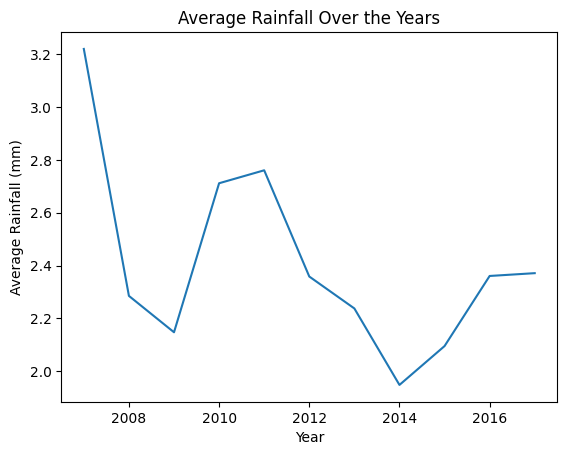

In [ ]:
# Created a line graph of average rainfall over the years
# Inference: From 2008 to 2016, there's has been an overall decrease in average rain from 3.2mm to about 2.4mm
# In 2014, average rainfall was lowest at less than 2mm
# Changes in rainfall alternate with going down and increasing again
plt.plot(avg_rainfall_per_year.index,avg_rainfall_per_year.values)
plt.title("Average Rainfall Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm)")
plt.show()

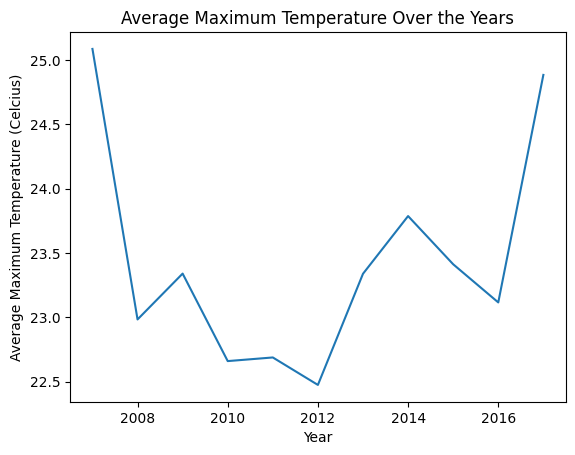

In [ ]:
# Created a line graph for average maximum temperature over the years
# Inference: From 2007 to 2017, the average maximum temperature fluctuates between 22.5 celcius and 25 celcius
# After a sharp decline around 2008, the temperature stabilizes at a lower level until 2012
# Around 2016, there's a very sharp increase till almost 25 celcius
plt.plot(avg_maxtemp_per_year.index,avg_maxtemp_per_year.values)
plt.title("Average Maximum Temperature Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (Celcius)")
plt.show()

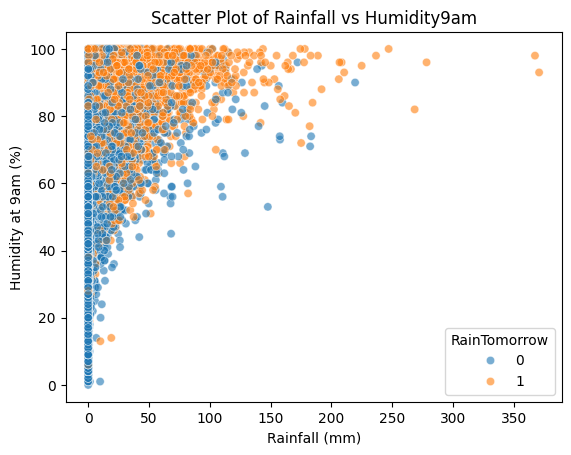

In [ ]:
# Plotting a scatter plot of humidity and rainfall
# Inference: Even on days when it rains, the humidity is quite high
# But when it did rain the next day, rainfall and humidity both have high values (the orange cluster at the top)
sns.scatterplot(x=df["Rainfall"], y=df["Humidity9am"], hue=df["RainTomorrow"], alpha=0.6)
plt.title("Scatter Plot of Rainfall vs Humidity9am")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Humidity at 9am (%)")
plt.legend(title='RainTomorrow', loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


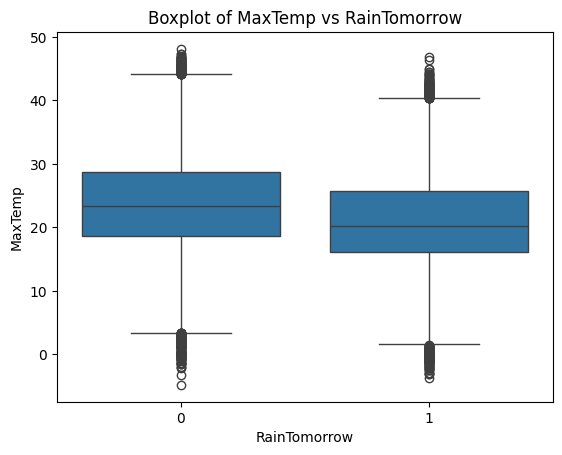

In [ ]:
# Plotting a boxplot for Maximum temperature and whether it rained the next day or not.
# Inference: For days when it didn't rain, the median maximum temperature was slightly higher than when it did.
# The minimum value for max temp is lower for when it did rain than when it didn't, so, colder days tend to be followed by rain
sns.boxplot(x=df["RainTomorrow"], y=df["MaxTemp"])
plt.title("Boxplot of MaxTemp vs RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("MaxTemp")
plt.show()

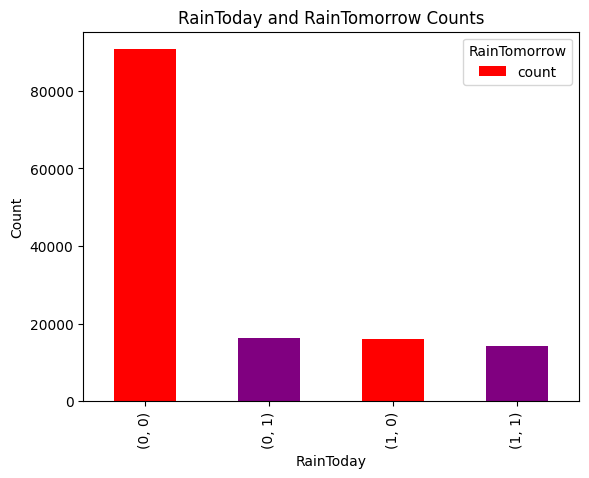

In [ ]:
# Plotting a count plot of both RainToday and RainTomorrow
# Inference: As shown in the graph, when it doesn't rain today, the count for it not raining tomorrow is more than 80000
# And when it rains today, the count for it not raining tomorrow is less than 20000
# This means that if it didn't rain one day, it's very likely that it won't rain the next day
# But if it did rain today, there's almost an equal chance of it raining or not raining the next day.
rain_count=df[["RainTomorrow","RainToday"]].value_counts()
rain_count.plot(kind="bar",stacked=False,color=["red","purple"])
plt.title("RainToday and RainTomorrow Counts")
plt.xlabel("RainToday")
plt.ylabel("Count")
plt.legend(title='RainTomorrow',loc="best")
plt.show()

In [ ]:
df.drop(columns=["Date","Year"],inplace=True)

In [ ]:
# Encoding categorical values of direction of strongest wind in the last 24 hours
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df,columns=["WindGustDir"],drop_first=False)
df_copy=df.copy()
df_copy=df_copy.drop(columns=["RainTomorrow"])
dummy_columns=df_copy.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137474 entries, 0 to 142192
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          137474 non-null  float64
 1   MaxTemp          137474 non-null  float64
 2   Rainfall         137474 non-null  float64
 3   WindGustSpeed    137474 non-null  float64
 4   WindSpeed9am     137474 non-null  float64
 5   WindSpeed3pm     137474 non-null  float64
 6   Humidity9am      137474 non-null  float64
 7   Humidity3pm      137474 non-null  float64
 8   Pressure9am      137474 non-null  float64
 9   Pressure3pm      137474 non-null  float64
 10  Temp9am          137474 non-null  float64
 11  Temp3pm          137474 non-null  float64
 12  RainToday        137474 non-null  int64  
 13  RISK_MM          137474 non-null  float64
 14  RainTomorrow     137474 non-null  int64  
 15  WindGustDir_E    137474 non-null  bool   
 16  WindGustDir_ENE  137474 non-null  bool   
 

In [ ]:
# Splitting the data into training and testing data with 65% training data
from sklearn.model_selection import train_test_split
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [ ]:
# Scaling the data to ensure it isn't affected by outliers or varying ranges of values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# Performing PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

In [ ]:
# Fitting data to the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_pca,y_train)

LogisticRegression()

In [ ]:
# Evaluating the LR Model using important metric like accuracy score, precision, recall and f1-score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred=log_reg.predict(x_test_pca)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9398121207082883
Confusion Matrix: 
 [[36840   757]
 [ 2139  8380]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     37597
           1       0.92      0.80      0.85     10519

    accuracy                           0.94     48116
   macro avg       0.93      0.89      0.91     48116
weighted avg       0.94      0.94      0.94     48116



In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={0:"Prediction"},inplace=True)
y_pred

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
48111,1
48112,0
48113,0
48114,0


In [ ]:
# Replacing 0s and 1s with Yes and No for displaying the predictions
y_pred=y_pred.replace(1,"Yes")
y_pred=y_pred.replace(0,"No")
# Saving the predictions in an output csv file
output_df = pd.DataFrame({
    "Index": x_test.index,
    "RainTomorrow": y_pred["Prediction"]
})
output_df.to_csv("Rain_LR_predictions.csv",index=False)

In [ ]:
import pickle

In [ ]:
pickle.dump(log_reg,open("/content/rain_LR_predict.pkl","wb"))

In [ ]:
pickle.dump(scaler,open("/content/scaler.pkl","wb"))

In [ ]:
pickle.dump(pca,open("/content/pca.pkl","wb"))

In [ ]:
pickle.dump(dummy_columns,open("/content/dummy_columns.pkl","wb"))